In [1]:
!pip install yfinance --quiet

     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 23.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
!pip install -U vectorbt --quiet

     |████████████████████████████████| 479 kB 7.9 MB/s 
     |████████████████████████████████| 288 kB 48.9 MB/s 
     |████████████████████████████████| 3.4 MB 52.5 MB/s 
     |████████████████████████████████| 25.3 MB 63.8 MB/s 
     |████████████████████████████████| 749 kB 56.1 MB/s 


In [3]:
!pip install -U kaleido --quiet

     |████████████████████████████████| 79.9 MB 109 kB/s 


In [4]:
import warnings
import vectorbt as vbt
warnings.filterwarnings('ignore')
%matplotlib inline

### **RSI**(Relative strength index) 


Indicates overbought and oversold moment of an asset. Comprised of just a separate drawn line from the asset price. The values ​​range from 0 to 100

* The closer the indicator value **is to 100**, the higher the **overbought level** of the asset.

* The **closer to 0** the value of the indicator, the greater the level of **oversold** of the asset.

(take out) We also have two fixed lines that indicate the overbought level and the oversold level.

We can use its signals to try to predict trend reversals. By using the IFR in this way, we assume that the moments of overbought or oversold of an asset precede an opposite movement of its price.

**IFR with Vectorbt**

In [5]:
# SENSEX Index data
data = vbt.YFData.download('^BSESN').get()

In [6]:
data.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-07-01 00:00:00+00:00,4263.109863,4301.770020,4247.660156,4300.859863,0,0,0
1997-07-02 00:00:00+00:00,4302.959961,4395.310059,4295.399902,4333.899902,0,0,0
1997-07-03 00:00:00+00:00,4335.790039,4393.290039,4299.970215,4323.459961,0,0,0
1997-07-04 00:00:00+00:00,4332.700195,4347.589844,4300.580078,4323.819824,0,0,0
1997-07-07 00:00:00+00:00,4326.810059,4391.009766,4289.490234,4291.450195,0,0,0
1997-07-08 00:00:00+00:00,4285.649902,4313.000000,4252.490234,4306.390137,0,0,0
1997-07-09 00:00:00+00:00,4315.419922,4404.830078,4315.419922,4404.689941,0,0,0
1997-07-10 00:00:00+00:00,4413.390137,4448.060059,4376.109863,4378.370117,0,0,0
1997-07-11 00:00:00+00:00,4372.750000,4372.750000,4301.930176,4321.979980,0,0,0


In [7]:
data.shape

(6175, 7)

Vectorbt allows us to easily plot the OHLCV chart, i.e. open (O), high (H), low (L), close (C) of each day on the candlestick and the daily volume on the bar chart below:

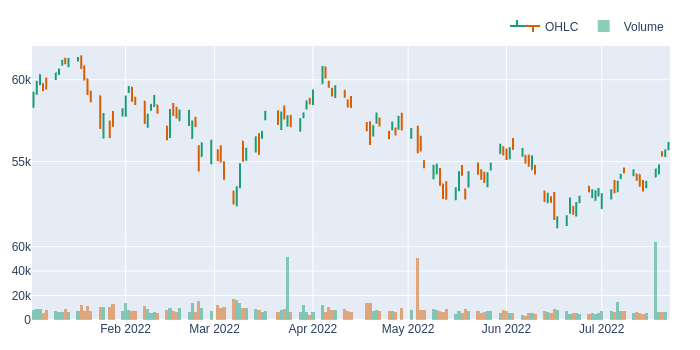

In [8]:
data['2022'].vbt.ohlcv.plot().show_png()

Selecting only the closing price

In [9]:
closing_price  = data['Close']

Running RSI

In [10]:
rsi = vbt.RSI.run(closing_price, window=14)

In [11]:
# sample of the result
rsi.rsi.tail()

Date
2022-07-18 00:00:00+00:00    65.939655
2022-07-19 00:00:00+00:00    70.188736
2022-07-20 00:00:00+00:00    74.109779
2022-07-21 00:00:00+00:00    77.163044
2022-07-22 00:00:00+00:00    77.443295
Name: (14, Close), dtype: float64

***

### Strategy

* **BUY** (= +1) when the index value is BELOW 30 (oversold).
* **SELL** (= -1) when the index value is ABOVE 70 (overbought).

In [12]:
buy = rsi.rsi_crossed_below(30) # oversold
sell = rsi.rsi_crossed_above(70) # overbought

Viewing the RSI and the overbought (70) and oversold (30) limits:

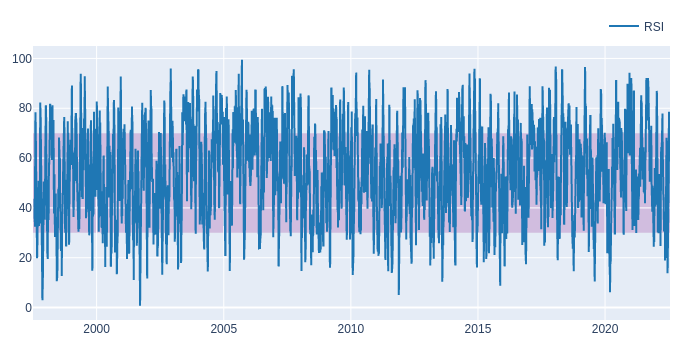

In [13]:
vbt.RSI.run(closing_price).plot(levels=(30, 70)).show_png()

### Backtest execution

Let's now pass the asset's price history in addition to the entry and exit points. I also set an initial investment of 100 and the data frequency as daily:

In [14]:
portfolio = vbt.Portfolio.from_signals(closing_price, buy, sell, init_cash=100, freq='d')

In [15]:
portfolio.stats()

Start                          1997-07-01 00:00:00+00:00
End                            2022-07-22 00:00:00+00:00
Period                                6175 days 00:00:00
Start Value                                        100.0
End Value                                     176.032394
Total Return [%]                               76.032394
Benchmark Return [%]                         1203.744652
Max Gross Exposure [%]                             100.0
Total Fees Paid                                      0.0
Max Drawdown [%]                                51.76007
Max Drawdown Duration                 1834 days 00:00:00
Total Trades                                          66
Total Closed Trades                                   66
Total Open Trades                                      0
Open Trade PnL                                       0.0
Win Rate [%]                                   65.151515
Best Trade [%]                                 15.183781
Worst Trade [%]                

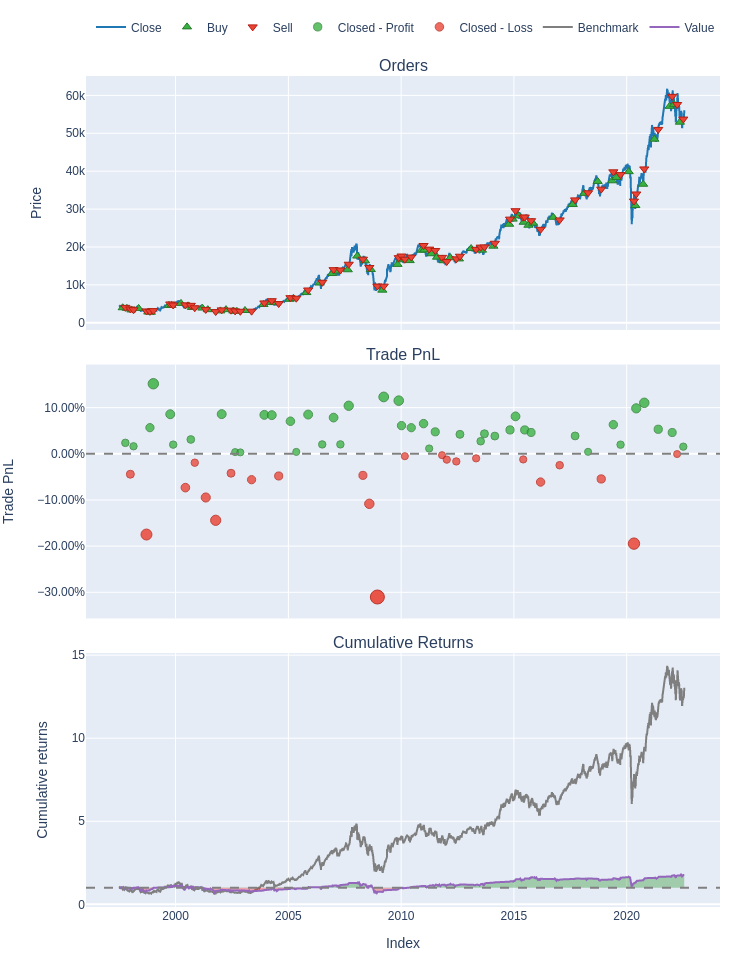

In [16]:
portfolio.plot().show_png()

### Comparing performance of Reliance, Tata Consulting Service and Adani Interprises using the same strategy

In [20]:
symbols = ["RELIANCE.NS", "TCS.NS", "ADANIENT.NS"]
closing = vbt.YFData.download(symbols).get('Close')
closing.ffill(inplace=True)

In [21]:
closing.tail()

symbol,RELIANCE.NS,TCS.NS,ADANIENT.NS
Date,,,
2022-07-18 00:00:00+00:00,2422.250000,3063.500000,2423.600098
2022-07-19 00:00:00+00:00,2437.100098,3074.250000,2451.300049
2022-07-20 00:00:00+00:00,2503.000000,3164.800049,2451.100098
2022-07-21 00:00:00+00:00,2486.300049,3177.300049,2495.500000
2022-07-22 00:00:00+00:00,2503.100098,3171.000000,2499.399902


In [22]:
rsi = vbt.RSI.run(closing, window=14)

In [23]:
buy = rsi.rsi_below(30) # oversold
sell = rsi.rsi_above(70) # overbought

In [24]:
portfolio = vbt.Portfolio.from_signals(closing, buy, sell, init_cash=10000, freq='d')

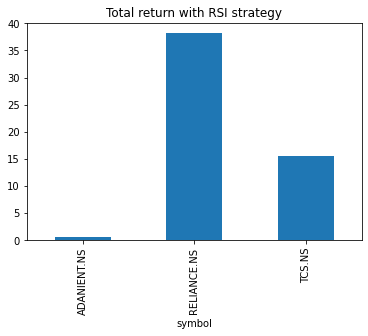

In [25]:
mean_return = portfolio.total_return().groupby('symbol').mean()
mean_return.plot(kind='bar', title='Total return with RSI strategy');

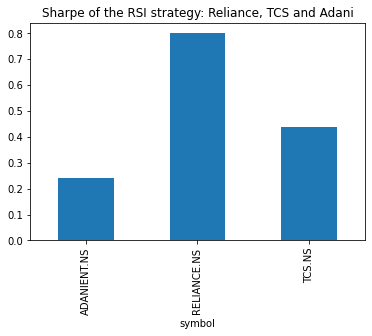

In [26]:
mean_sharpe = portfolio.sharpe_ratio().groupby('symbol').mean()
mean_sharpe.plot(kind='bar', title='Sharpe of the RSI strategy: Reliance, TCS and Adani');